In [1]:
import pandas as pd

# Charger le CSV
df = pd.read_csv("Airbnb_Open_Data.csv")

# Nettoyage des colonnes numériques (retirer $ et espaces)
df["price"] = df["price"].str.replace("$", "").str.replace(",", "").str.strip().astype(float)
df["service fee"] = df["service fee"].str.replace("$", "").str.replace(",", "").str.strip().astype(float)

# Supprimer les colonnes non quantitatives ou inutiles pour l'ACP
colonnes_a_supprimer = [
    'id', 'NAME', 'host id', 'host name', 'neighbourhood group', 'neighbourhood',
    'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy',
    'room type', 'last review', 'house_rules', 'license'
]
df_clean = df.drop(columns=colonnes_a_supprimer)

# Supprimer les lignes avec valeurs manquantes
df_clean = df_clean.dropna()

# Vérifier
print(df_clean.head())


C:\Users\Abdellatif\AppData\Local\Temp\ipykernel_20132\3070795500.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


  host_identity_verified  Construction year  price  service fee  \
0            unconfirmed             2020.0  966.0        193.0   
1               verified             2007.0  142.0         28.0   
3            unconfirmed             2005.0  368.0         74.0   
4               verified             2009.0  204.0         41.0   
5               verified             2013.0  577.0        115.0   

   minimum nights  number of reviews  reviews per month  review rate number  \
0            10.0                9.0               0.21                 4.0   
1            30.0               45.0               0.38                 4.0   
3            30.0              270.0               4.64                 4.0   
4            10.0                9.0               0.10                 3.0   
5             3.0               74.0               0.59                 3.0   

   calculated host listings count  availability 365  
0                             6.0             286.0  
1             

In [2]:
# Encodage binaire (True/False → 1/0)
df_clean["host_identity_verified"] = df_clean["host_identity_verified"].map({"verified": 1, "unconfirmed": 0})


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


C:\Users\Abdellatif\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


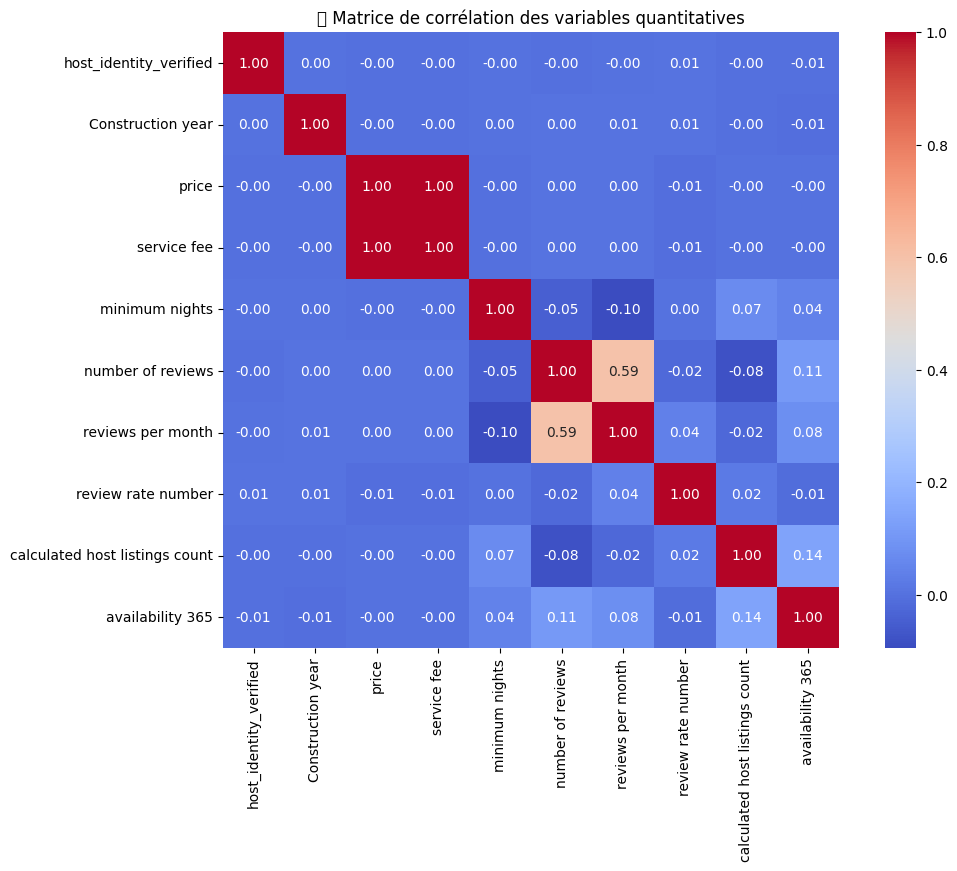

In [7]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔗 Matrice de corrélation des variables quantitatives")
plt.show()

C:\Users\Abdellatif\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


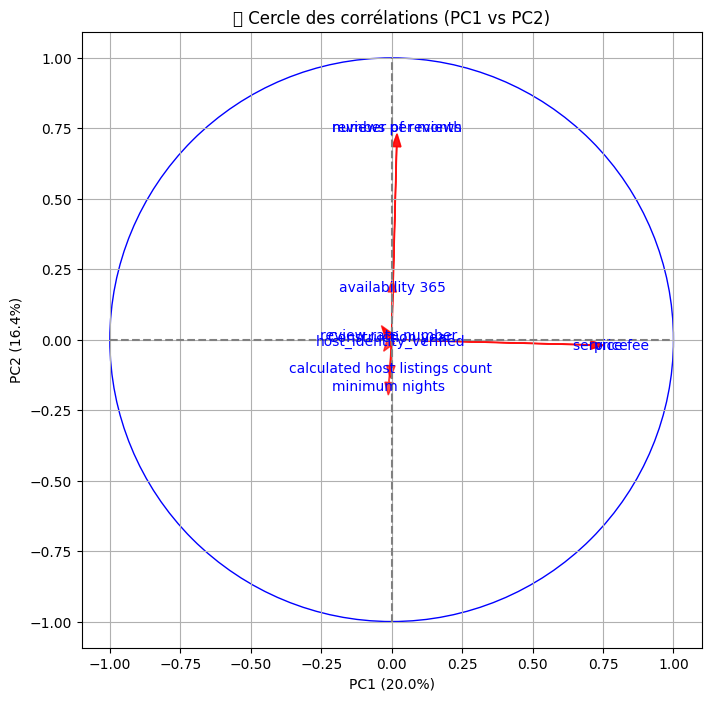

In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Refaire le PCA avec toutes les composantes
pca_full = PCA()
X_scaled = StandardScaler().fit_transform(df_clean)
pca_full.fit(X_scaled)

# Composantes principales
components = pca_full.components_

# Noms des variables
features = df_clean.columns

# Cercle
plt.figure(figsize=(8, 8))
for i in range(len(features)):
    plt.arrow(0, 0,
              components[0, i],
              components[1, i],
              color='r', alpha=0.7, head_width=0.03)
    plt.text(components[0, i]*1.1,
             components[1, i]*1.1,
             features[i],
             color='b', ha='center', va='center')

# Cercles + axes
plt.plot([-1, 1], [0, 0], color='grey', linestyle='--')
plt.plot([0, 0], [-1, 1], color='grey', linestyle='--')
circle = plt.Circle((0, 0), 1, color='b', fill=False)
plt.gca().add_artist(circle)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("PC1 (%.1f%%)" % (pca_full.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.1f%%)" % (pca_full.explained_variance_ratio_[1]*100))
plt.title("🔵 Cercle des corrélations (PC1 vs PC2)")
plt.grid()
plt.axis('equal')
plt.show()
